In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [29]:
import gensim
import cPickle as pickle

In [36]:
import plotly.plotly as ply
import plotly.graph_objs as plgo

In [5]:
models_dn = '/home/patrick/projects/ShiCo Sprint/'

In [6]:
m1 = model_1950_10y = gensim.models.Word2Vec.load_word2vec_format(models_dn + '1950_1959.w2v',
                                                                  fvocab=models_dn + '1950_1959.vocab.w2v',
                                                                  binary=True)
m2 = model_1951_10y = gensim.models.Word2Vec.load_word2vec_format(models_dn + '1951_1960.w2v',
                                                                  fvocab=models_dn + '1951_1960.vocab.w2v',
                                                                  binary=True)

In [7]:
len(model_1950_10y.vocab), len(model_1951_10y.vocab)

(692536, 749216)

In [8]:
count1 = {key: val.count for key, val in m1.vocab.iteritems()}
count2 = {key: val.count for key, val in m2.vocab.iteritems()}

In [9]:
vocab_count_sorted1 = sorted(count1, key=count1.get, reverse=True)
vocab_count_sorted2 = sorted(count2, key=count2.get, reverse=True)

In [10]:
count_list1 = [count for word, count in count1.iteritems()]
count_list2 = [count for word, count in count2.iteritems()]

In [11]:
np.sum(count_list1), np.sum(count_list2)

(355987241, 390568219)

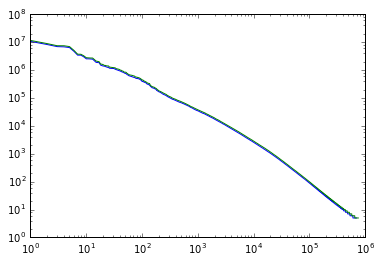

In [12]:
plt.loglog(sorted(count_list1, reverse=True))
plt.loglog(sorted(count_list2, reverse=True))

In [13]:
vocab_combined = list(set(model_1950_10y.vocab.keys()).union(set(model_1951_10y.vocab.keys())))

In [14]:
count_combined = []
for w in vocab_combined:
    try:
        c1 = m1.vocab[w].count
    except KeyError:
        c1 = 0
    try:
        c2 = m2.vocab[w].count
    except KeyError:
        c2 = 0
    count_combined.append(c1 + c2)

In [15]:
vocab_comb_sort = [x for y, x in sorted(zip(count_combined, vocab_combined), reverse=True)]
count_comb_sort = sorted(count_combined, reverse=True)

In [16]:
vocab_comb_sort[:10], count_comb_sort[:10]

([u'de', u'van', u'het', u'en', u'een', u'in', u'te', u'op', u'dat', u'is'],
 [42186155,
  22203733,
  17081110,
  14389867,
  14226050,
  13347968,
  9786355,
  7132927,
  7104682,
  6235311])

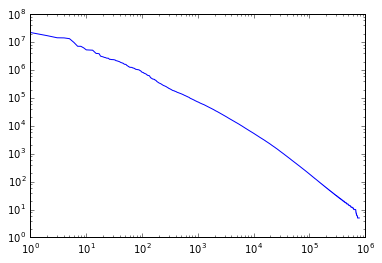

In [17]:
plt.loglog(count_comb_sort)

In [18]:
soestdijk1 = m1.vocab['soestdijk']

In [19]:
soestdijk1.count

3246

In [20]:
cum_count = np.cumsum(count_comb_sort)

In [21]:
np.random.randint(cum_count.max())
ix_rand = np.searchsorted(cum_count, )
w_rand = vocab_comb_sort[ix_rand]
w_rand

TypeError: searchsorted() takes at least 2 arguments (1 given)

In [22]:
p_word_comb_sort = np.array(count_comb_sort) / float(np.sum(count_comb_sort))

In [23]:
N_val_words = 1000

In [24]:
val_words = list(np.random.choice(vocab_comb_sort, size=N_val_words, replace=False, p=p_word_comb_sort))

In [25]:
topN_sim = 50

In [26]:
def jaccard_similarity(set1, set2):
    return len(set1.intersection(set2)) / float(len(set1.union(set2)))

In [27]:
p_word_comb_sort_dict = dict(zip(vocab_comb_sort, p_word_comb_sort))

In [34]:
# val_p = []
# val_jaccard = []
# for val_word in val_words:
#     val_p.append(p_word_comb_sort_dict[val_word])

#     try:
#         sim_words1 = [word for word, _ in m1.most_similar(val_word, topn=topN_sim)]
#         sim_words2 = [word for word, _ in m2.most_similar(val_word, topn=topN_sim)]
#         val_jaccard.append(jaccard_similarity(set(sim_words1), set(sim_words2)))
#     except KeyError:
#         val_jaccard.append(0.)

val_p = pickle.load(open('probval2_data/val_p_top50_1000words.pickle', 'r'))
val_words = pickle.load(open('probval2_data/val_words_top50_1000words.pickle', 'r'))
val_jaccard = pickle.load(open('probval2_data/val_jaccard_top50_1000words.pickle', 'r'))

In [32]:
pickle.dump(val_p, open('probval2_data/val_p_top50_1000words.pickle', 'w'), protocol=2)
pickle.dump(val_words, open('probval2_data/val_words_top50_1000words.pickle', 'w'), protocol=2)
pickle.dump(val_jaccard, open('probval2_data/val_jaccard_top50_1000words.pickle', 'w'), protocol=2)

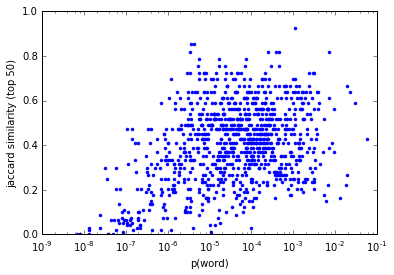

In [35]:
plt.semilogx(val_p, val_jaccard, '.')
plt.xlabel('p(word)')
plt.ylabel('jaccard similarity (top 50)')

In [37]:
trace0 = plgo.Scatter(
  x=val_p,
  y=val_jaccard,
  text=val_words,
  mode="markers"
)
# trace1 = plgo.Scatter(
#   x=[1, 2, 3, 4],
#   y=[16, 5, 11, 9]
# )
data = plgo.Data([trace0,])#, trace1])
layout = plgo.Layout(
    xaxis=dict(
        type='log',
        autorange=True
    ),
    yaxis=dict(
        type='lin',
        autorange=True
    ),
    hovermode = 'closest',
#     width=500,
    height=700,
)
fig = plgo.Figure(data=data, layout=layout)
ply.iplot(fig)

# ply.iplot(data, filename = 'basic-line')

In [38]:
m1.most_similar('zijn')

[(u'z\xfcn', 0.8560155034065247),
 (u'zrjn', 0.8366921544075012),
 (u'zyn', 0.8275719881057739),
 (u'zjjn', 0.7892638444900513),
 (u'ziin', 0.7694714665412903),
 (u'ztjn', 0.7418159246444702),
 (u'zun', 0.7395227551460266),
 (u'zfln', 0.7272780537605286),
 (u'znn', 0.7247384190559387),
 (u'zqn', 0.6712801456451416)]

In [43]:
m1.vocab['zijn'].count / float(np.sum(count_list1)) / (m1.vocab['zrjn'].count / float(np.sum(count_list1)))

330.3362508164598

In [39]:
m1.most_similar('soestdijk')

[(u'soestd\xfck', 0.5641106963157654),
 (u'socstdijk', 0.5477716326713562),
 (u'soestdiik', 0.5407779216766357),
 (u'soestdjjk', 0.5311074256896973),
 (u'sommelsdijk', 0.5250560641288757),
 (u'soestdrjk', 0.5139874815940857),
 (u'sloterdijk', 0.512660801410675),
 (u'laeken', 0.5081022381782532),
 (u'soestdyk', 0.4955380856990814),
 (u'malacanan', 0.49514538049697876)]